## This model predicts a heart disease based on various HEALTH factors

In [39]:
#Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split


In [66]:
#importing the data set

df=pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
#checking the dataframe shape
print(df.shape)

(303, 14)


In [109]:
#making the FEATURES dataframe
X=df.drop(["target"],axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [110]:
#making the LABELS dataframe
Y=df["target"]
Y.tail()

# label 1 indicates heart disease, label 0 indicates no heart disease

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

In [111]:
#NORMALISING the FEATURES dataframe
normalized_X=(X-X.min())/(X.max()-X.min())


In [112]:
normalized_X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [113]:
#making Training and Testing data 

X_train,X_test,Y_train,Y_test =train_test_split(normalized_X,Y,test_size=0.2,random_state=3)

In [114]:
print(X_train.shape)

(242, 13)


In [115]:
#importing KERAS and subsequent methods
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout



In [125]:
#building our NEURAl NETWORK
model=Sequential()

#adding input layer and first hidden layer
model.add(Dense(32,activation="relu",input_dim=13))

#adding 2nd hidden layer
model.add(Dense(64,activation='relu'))

#adding output layer
model.add(Dense(1,activation='sigmoid'))

#compiling the ANN
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])



In [126]:
#fitting the model
model.fit(X_train,Y_train,batch_size=12,epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 544us/step - loss: 0.6729 - accuracy: 0.6116
Epoch 2/250
21/21 [==============================] - 0s 506us/step - loss: 0.6198 - accuracy: 0.7603
Epoch 3/250
21/21 [==============================] - 0s 491us/step - loss: 0.5718 - accuracy: 0.7934
Epoch 4/250
21/21 [==============================] - 0s 501us/step - loss: 0.5332 - accuracy: 0.7893
Epoch 5/250
21/21 [==============================] - 0s 483us/step - loss: 0.4904 - accuracy: 0.8058
Epoch 6/250
21/21 [==============================] - 0s 450us/step - loss: 0.4596 - accuracy: 0.7975
Epoch 7/250
21/21 [==============================] - 0s 487us/step - loss: 0.4412 - accuracy: 0.8099
Epoch 8/250
21/21 [==============================] - 0s 488us/step - loss: 0.4213 - accuracy: 0.8099
Epoch 9/250
21/21 [==============================] - 0s 499us/step - loss: 0.4093 - accuracy: 0.8306
Epoch 10/250
21/21 [==============================] - 0s 437us/step - loss: 0.3983 - accura

In [127]:
#train accuracy
loss,accuracy=model.evaluate(X_train,Y_train,batch_size=12)
print('loss:',loss,'\n'
     'accuracy: ',accuracy*100)

21/21 [==============================] - 0s 482us/step - loss: 0.0656 - accuracy: 0.9752
loss: 0.06563737988471985 
accuracy:  97.52066135406494


In [128]:
#Testing score 
score=model.evaluate(X_test,Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

2/2 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.9180
Test loss: 0.3875511586666107
Test accuracy: 91.80327653884888


In [130]:
#making predictions
Y_preds=model.predict(X_test)

2/2 [==============================] - 0s 1ms/step


In [131]:
#converting predictions to 0/1
for i in range(0, 61) :
    if Y_preds[i]<=0.5:
        Y_preds[i]=0
    else:
        Y_preds[i]=1
        

In [132]:
#confusion matrix
cm=tf.math.confusion_matrix(Y_test,Y_preds)
cm



<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[17,  4],
       [ 1, 39]], dtype=int32)>

Text(45.722222222222214, 0.5, 'True Value')

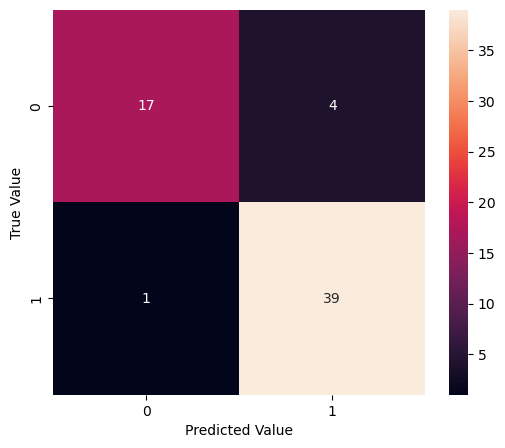

In [139]:
#visualising results of ANN model

import seaborn as sb

plt.figure(figsize=(6,5))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')